In [32]:
# Use islands conda env
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

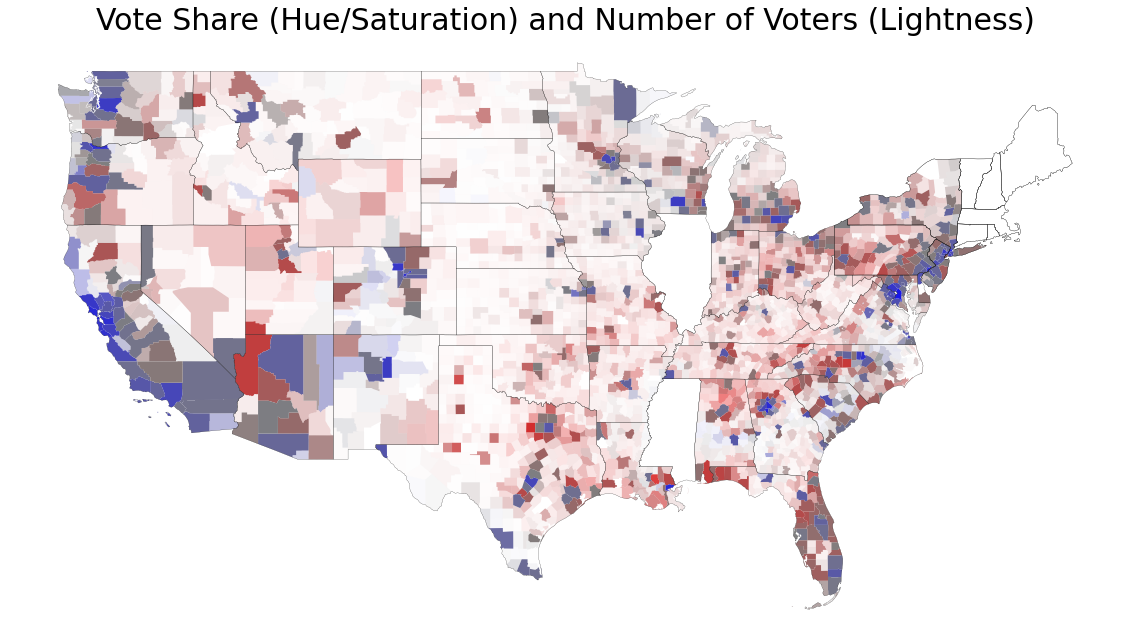

In [34]:
def shape_df_maker():
    STATEFP_dict = dict([['31', 'Nebraska'],
                         ['53', 'Washington'],
                         ['35', 'New Mexico'],
                         ['46', 'South Dakota'],
                         ['48', 'Texas'],
                         ['06', 'California'],
                         ['21', 'Kentucky'],
                         ['39', 'Ohio'],
                         ['01', 'Alabama'],
                         ['13', 'Georgia'],
                         ['55', 'Wisconsin'],
                         ['41', 'Oregon'],
                         ['42', 'Pennsylvania'],
                         ['28', 'Mississippi'],
                         ['29', 'Missouri'],
                         ['37', 'North Carolina'],
                         ['40', 'Oklahoma'],
                         ['54', 'West Virginia'],
                         ['36', 'New York'],
                         ['18', 'Indiana'],
                         ['20', 'Kansas'],
                         ['16', 'Idaho'],
                         ['32', 'Nevada'],
                         ['50', 'Vermont'],
                         ['30', 'Montana'],
                         ['27', 'Minnesota'],
                         ['38', 'North Dakota'],
                         ['15', 'Hawaii'],
                         ['04', 'Arizona'],
                         ['10', 'Delaware'],
                         ['44', 'Rhode Island'],
                         ['08', 'Colorado'],
                         ['49', 'Utah'],
                         ['51', 'Virginia'],
                         ['56', 'Wyoming'],
                         ['22', 'Louisiana'],
                         ['26', 'Michigan'],
                         ['25', 'Massachusetts'],
                         ['12', 'Florida'],
                         ['78', 'United States Virgin Islands'],
                         ['09', 'Connecticut'],
                         ['34', 'New Jersey'],
                         ['24', 'Maryland'],
                         ['45', 'South Carolina'],
                         ['23', 'Maine'],
                         ['33', 'New Hampshire'],
                         ['11', 'District of Columbia'],
                         ['66', 'Guam'],
                         ['69', 'Commonwealth of the Northern Mariana Islands'],
                         ['60', 'American Samoa'],
                         ['19', 'Iowa'],
                         ['72', 'Puerto Rico'],
                         ['05', 'Arkansas'],
                         ['47', 'Tennessee'],
                         ['17', 'Illinois'],
                         ['02', 'Alaska']])

    shape_df = gpd.read_file('data/cb_2018_us_county_5m.shp')
    shape_df['State'] = shape_df.apply(
        lambda x: STATEFP_dict[x['STATEFP']], axis=1)
    shape_df = shape_df.drop(['STATEFP', 'COUNTYFP', 'COUNTYNS',
                              'AFFGEOID', 'GEOID', 'LSAD', 'ALAND', 'AWATER'], axis=1)
    shape_df.columns = ['County', 'geometry', 'State']

    return shape_df

def merged_df_maker(shape_df):
    all_state_df = pd.read_csv('County level data.csv')
    # one_df = gpd.GeoDataFrame(one_df)
    one_df = shape_df.merge(all_state_df)
    # hi_df = one_df[one_df['State'] == 'Hawaii']
    one_df = one_df[one_df['State'] != 'Hawaii']
    one_df.rgb = one_df.rgb.apply(lambda x: eval(x))
    return one_df



def plotter(df, save=False):
    fig, ax = plt.subplots(figsize=(20, 20))
    fig.set_facecolor('w')
    plt.title('Vote Share (Hue/Saturation) and Number of Voters (Lightness)', fontsize=30)
    plt.axis('off')
    ax.set_aspect('equal')

    # axin = ax.inset_axes([-135, 25, 9, 9], transform=ax.transData)
    # axin.set_aspect('equal')
    # _ = hi_df.plot(color=hi_df['rgb'], ax=axin, missing_kwds={"color": "yellow"})

    base = df.plot(color=df['rgb'], ax=ax, missing_kwds={"color": "yellow"})
    state_shapes = gpd.read_file('data/usa-states-census-2014.shp')
    state_shapes.plot(ax=base, facecolor="none", edgecolor="black", linewidth=.2)
    if save: fig.savefig('maps/county_muddy_map.png', dpi=fig.dpi, bbox_inches = 'tight')
    plt.show()

def main():
    shape_df = shape_df_maker()
    df = merged_df_maker(shape_df)
    plotter(df, save=True)

if __name__ == '__main__':
    main()